In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [3]:
## Load in built in dataset
df = sns.load_dataset('flights') 
df

year month  passengers
0    1949   Jan         112
1    1949   Feb         118
2    1949   Mar         132
3    1949   Apr         129
4    1949   May         121
..    ...   ...         ...
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432

[144 rows x 3 columns]

### Line Plot

In [1]:
#Choose only January Flights
jan_flights = df.query("month == 'Jan'")
sns.lineplot(data=jan_flights, x="year", y="passengers")

NameError: name 'df' is not defined

### Histogram

<AxesSubplot:xlabel='passengers', ylabel='Count'>

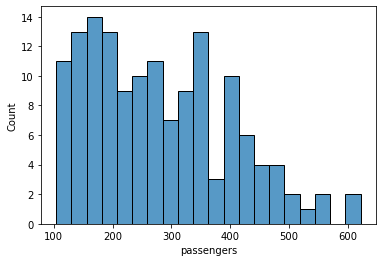

In [5]:
sns.histplot(df['passengers'], bins = 20)

## see how it automatically provides x & ylabels?

In [6]:
### Scatterplot
df2 = sns.load_dataset('iris')
df2

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

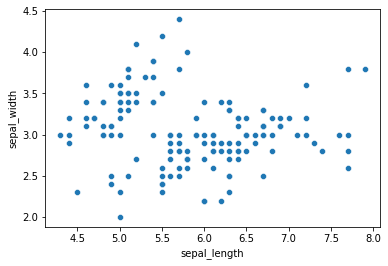

In [7]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=df2)

### Joint Plot

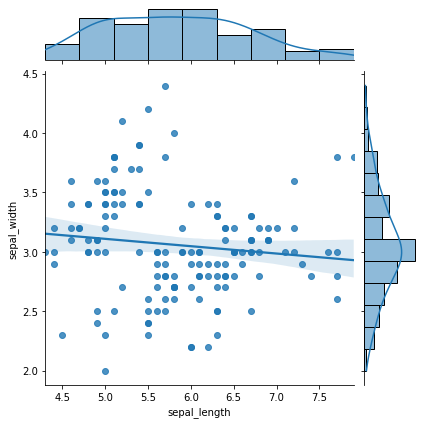

In [8]:
## Joint Plot
sns.jointplot(x='sepal_length', y='sepal_width', data=df2, kind='reg')
sns.jointplot

### Pair Plot
Pair Plot plots relationships across all numerical values in the data frame

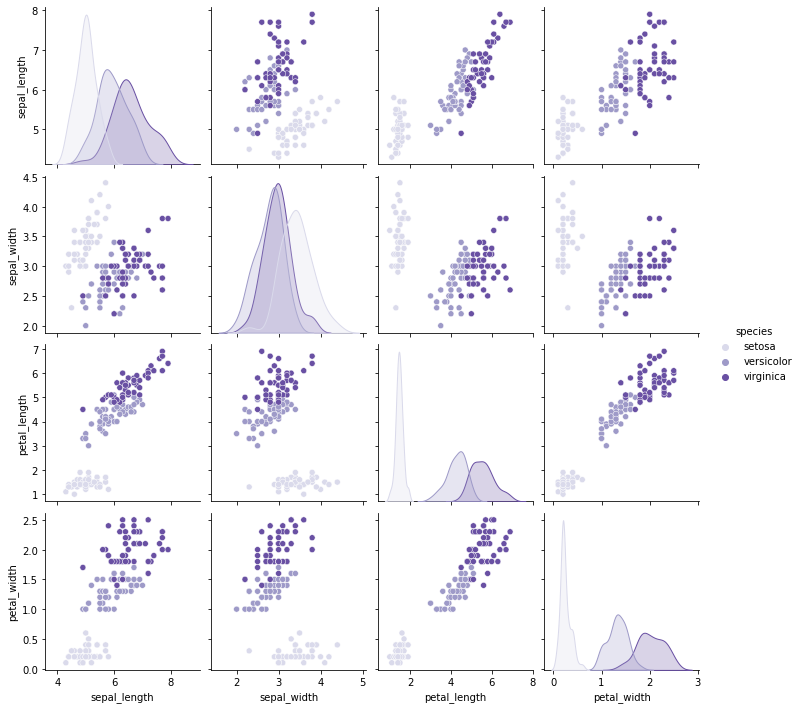

In [11]:
#sns.pairplot(df2)

# Use hue to add categorical column to color code the chart by
# Options in Matplotlib: https://matplotlib.org/stable/tutorials/colors/colormaps.html
sns.pairplot(df2, hue='species', palette='Purples')

### Bar Plots

Categorical estimator plot (grouping up by a category and plotting statistical estimator)

In [15]:
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

Text(0, 0.5, 'Total Bill ($)')

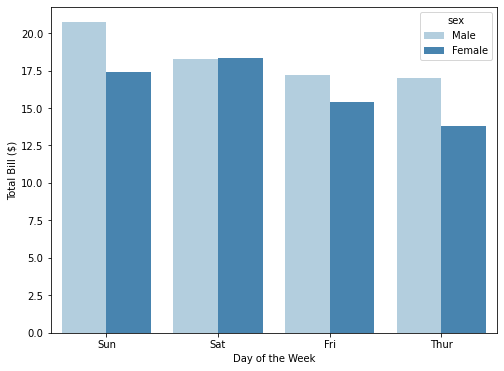

In [19]:
# Estimator: Statistical function to estimate within each categorical bin.
# provided by NumPy : median, std, var, cov or make your own functions

tips = sns.load_dataset("tips")
#sns.barplot(x="day", y="total_bill", data=tips)
### grouped by the day column and taken the mean total bill for each group (mean is the default)
### by default, the black bars show the confidence intervals

##### Adding some styling & more advanced features
plt.figure(figsize =(8, 6))
sns.barplot(x="day", y="total_bill", estimator=np.median, hue="sex", ci=None, data=tips, palette ='Blues', 
          order = ['Sun', 'Sat', 'Fri', 'Thur'])

plt.xlabel('Day of the Week')
plt.ylabel('Total Bill ($)')

In [20]:
tips.groupby('day').total_bill.mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

<AxesSubplot:xlabel='total_bill', ylabel='day'>

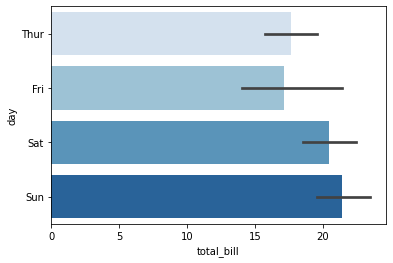

In [21]:
## Switch the axes
sns.barplot(x="total_bill", y="day", data=tips, palette ='Blues')

### More Styling
Per Seaborn Documentation: There are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks. They are each suited to different applications and personal preferences. The default theme is darkgrid. As mentioned above, the grid helps the plot serve as a lookup table for quantitative information, and the white-on grey helps to keep the grid from competing with lines that represent data. The whitegrid theme is similar, but it is better suited to plots with heavy data elements:

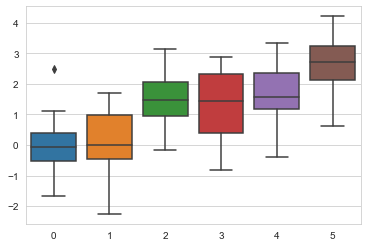

In [23]:
sns.set_style('whitegrid')

data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data);

Temporarily Setting Figure Style
http://seaborn.pydata.org/tutorial/aesthetics.html

In [24]:
#function to plot some offset sine waves, which will help us see the different stylistic parameters we can tweak.
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

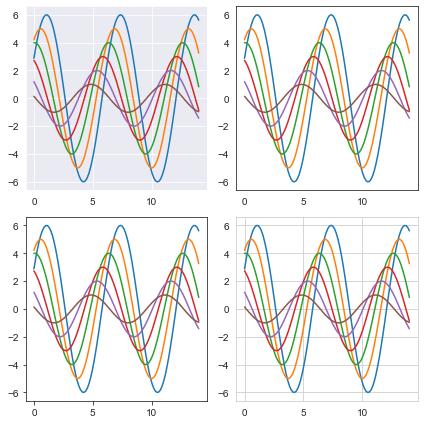

In [25]:
f = plt.figure(figsize=(6, 6))
gs = f.add_gridspec(2, 2)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sinplot()

with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 1])
    sinplot()

with sns.axes_style("ticks"):
    ax = f.add_subplot(gs[1, 0])
    sinplot()

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[1, 1])
    sinplot()

f.tight_layout()

### Violin Plot
Combination of a box plot and KDE plot
Uses KDE estimation of data to plot the points

<AxesSubplot:xlabel='day', ylabel='total_bill'>

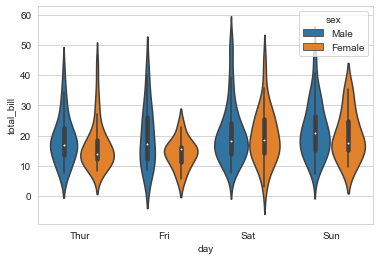

In [26]:
sns.violinplot(x='day', y='total_bill', data = tips, hue = 'sex')

Seaborn Gallery:  
https://seaborn.pydata.org/examples/index.html

In [ ]:
### In a breakout room, explore the gallery and pick a plot to something cool or interesting in the Diamonds dataset 
data = sns.load_dataset('diamonds')

## Full Exploratory Data Analysis

Goal: Understand how variables in a housing dataset impact price (credit Towards Data Science)

In [27]:
house = pd.read_csv('Ames-Housing-Data.csv')
house

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [28]:
numerical = [
  'SalePrice', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr'
]
categorical = [
  'MSZoning', 'LotShape', 'Neighborhood', 'CentralAir', 'SaleCondition', 'MoSold', 'YrSold'
]

house = house[numerical + categorical]


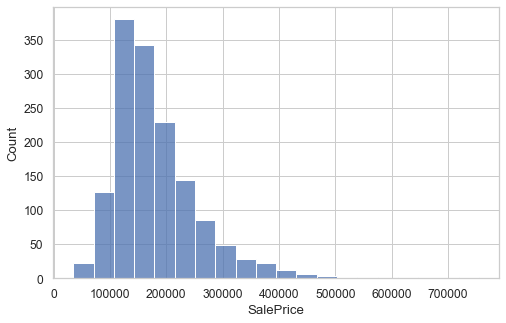

In [29]:
# styling
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

# How are our sale prices distributed? 
sns.histplot(house['SalePrice'], kde=False, bins=20)
plt.xlabel=('Sale Price')
plt.ylabel=('Count')

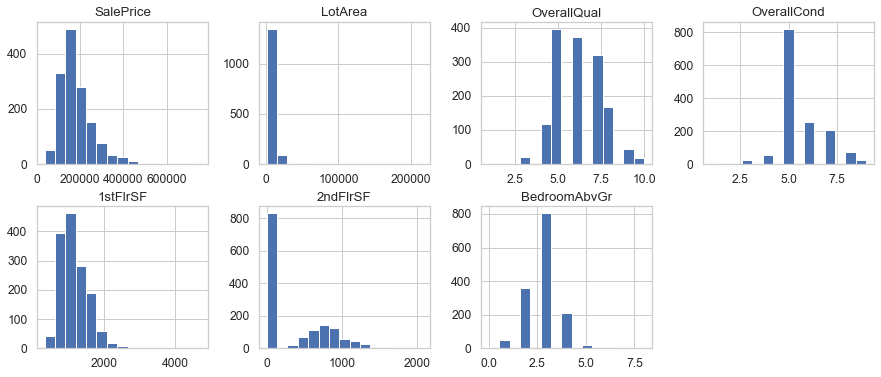

In [30]:
## Why not look at all the numerical variables:

house[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));

## What do you see?

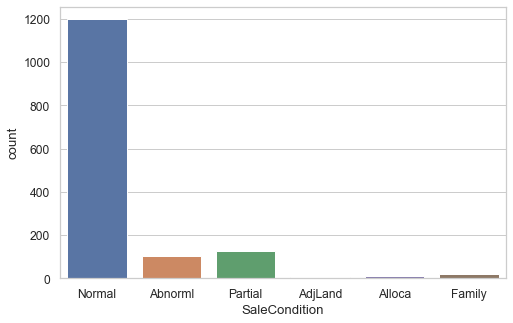

In [31]:
## Now let's look at the categorical variables (typically the best way to do this is with a barplot)

sns.countplot(x = 'SaleCondition', data = house);

## Here we can see that there is very high number houses sold in normal condition with a few other random conditions

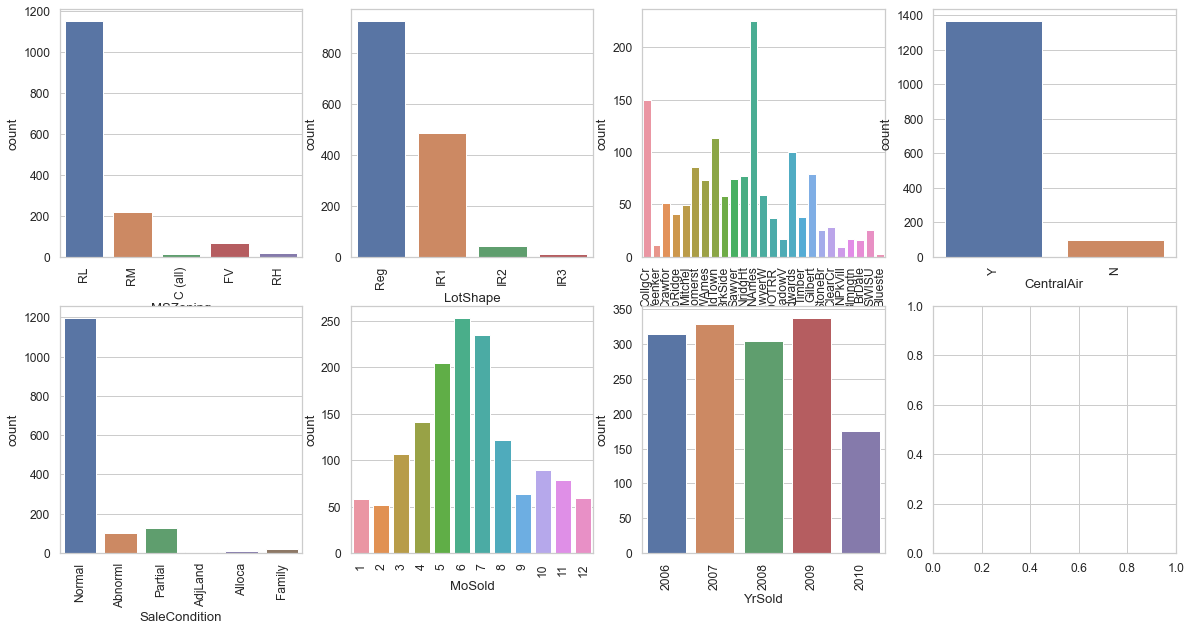

In [32]:
## create a 2 x 4 grid
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

## iterate over every categorical variable to create a countplot
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(x=variable, data = house, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [33]:
## Closer look at what happened in 2010
house[house['YrSold'] == 2010].groupby('MoSold')['YrSold'].count()

MoSold
1    10
2    15
3    21
4    39
5    48
6    36
7     6
Name: YrSold, dtype: int64

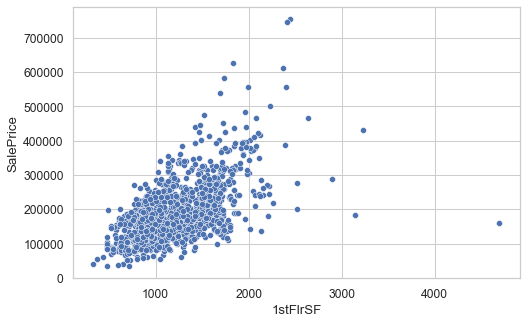

In [34]:
## Let's start to look at some relationships, first between two numerical values

sns.scatterplot(x=house['1stFlrSF'], y=house['SalePrice']);

## 1stFlrSF = first floor square footage

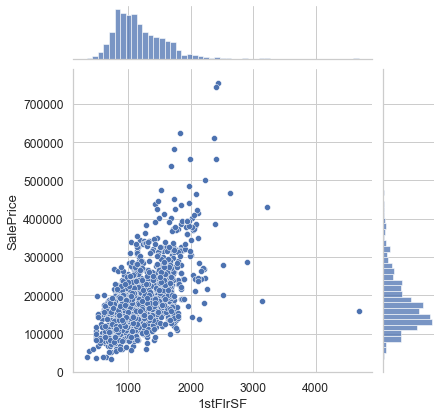

In [35]:
## Distribution for each & relationship to eachother can be a nice visual in the jointplot
sns.jointplot(x=house['1stFlrSF'], y=house['SalePrice']);

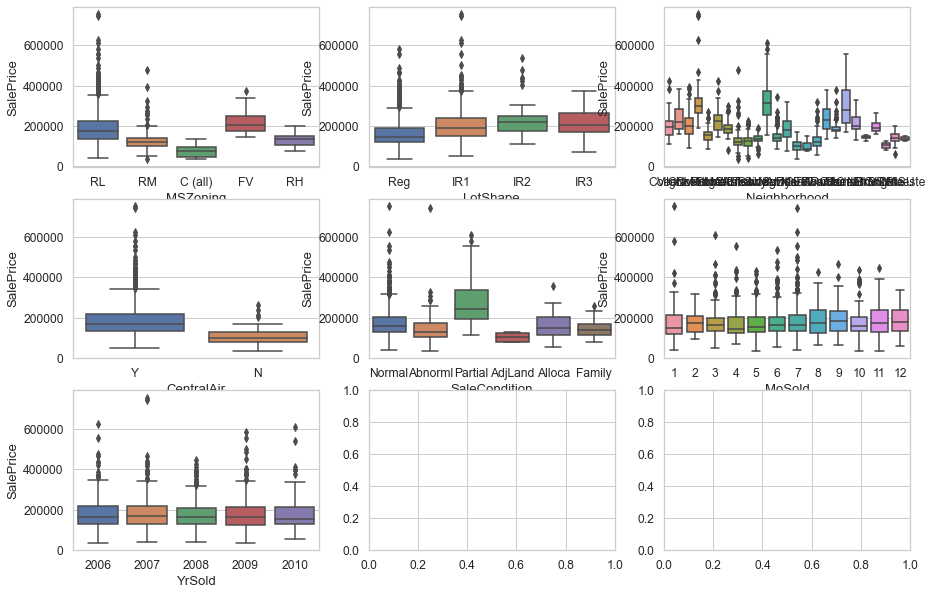

In [36]:
## Using box & whisker plots to look at the relationships between numerical variables and categorical variables

fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=house, ax=subplot)
      
## Here we have a box plot for every categorical variable & it's relationship to Sales Price

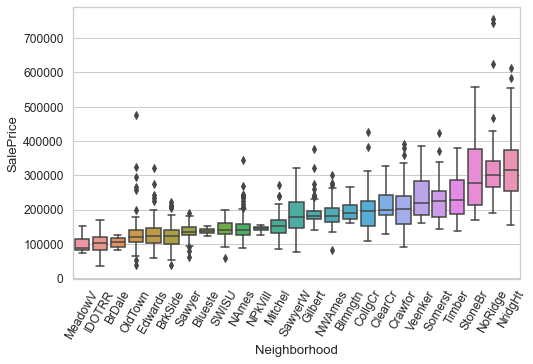

In [37]:
# sort our box plots by cheapest neighborhood to most expensive (by median price)

# First we sort the data from cheapest to most expensive by median price
sorted_nb = house.groupby(['Neighborhood'])['SalePrice'].median().sort_values()

# Use that ordered  
sns.boxplot(x=house['Neighborhood'], y=house['SalePrice'], order=list(sorted_nb.index))
plt.xticks(rotation=60);

## What do we see? 

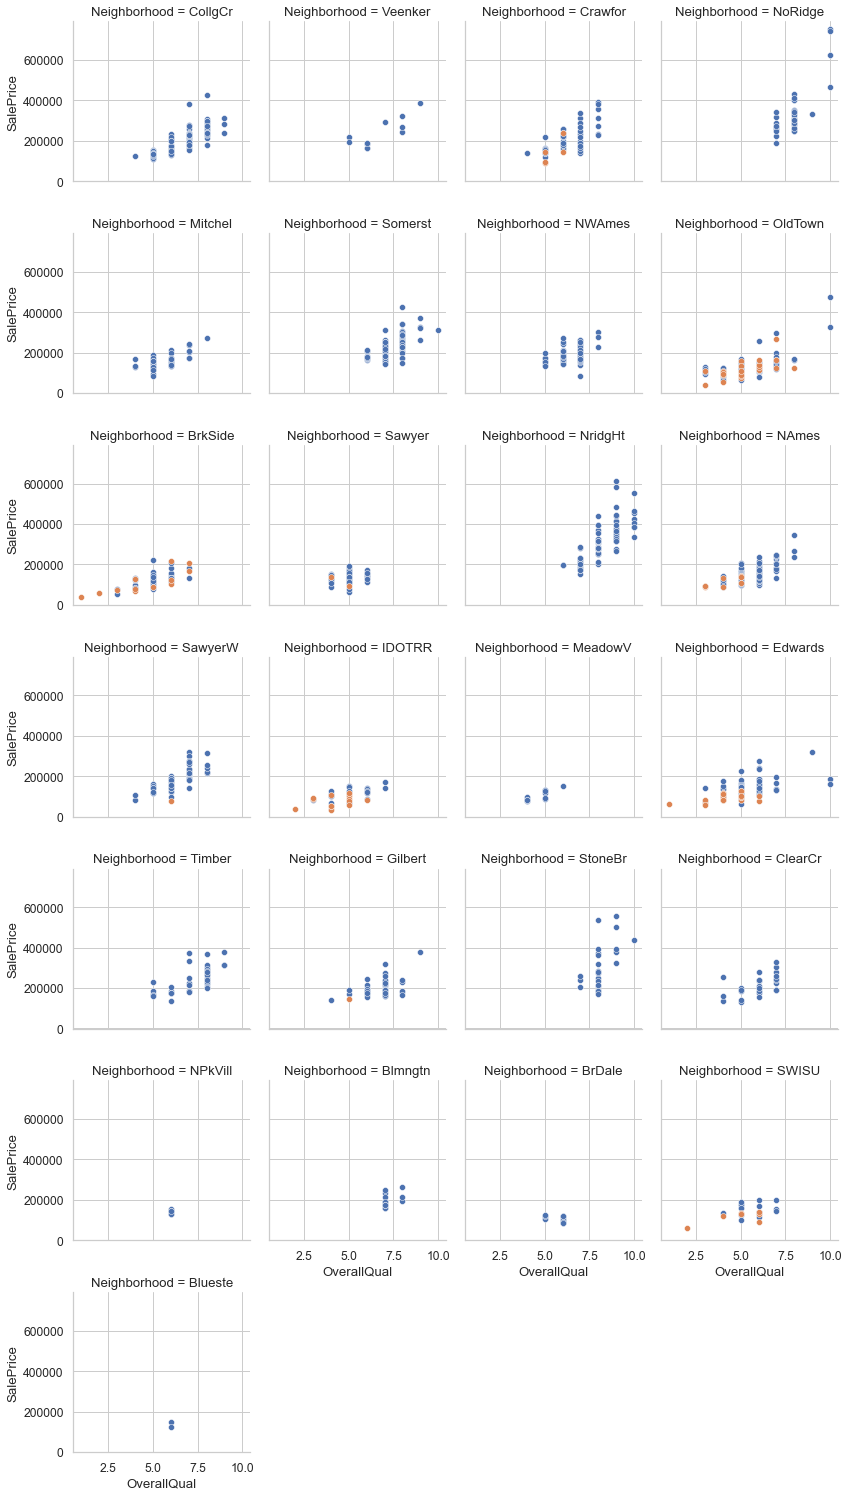

In [38]:
## using the FacetGrid function we can visualize a scatter plot between the OverallQual and the SalePrice variables:

cond_plot = sns.FacetGrid(data=house, col='Neighborhood', hue='CentralAir', col_wrap=4)
cond_plot.map(sns.scatterplot, 'OverallQual', 'SalePrice');

## 
## Hue is set for Central Air so houses without central air are organge

### Regression Plots
http://seaborn.pydata.org/tutorial/regression.html

(code below inspired by derekbanas github)

"Seaborn is not itself a package for statistical analysis. To obtain quantitative measures related to the fit of regression models, you should use statsmodels. The goal of seaborn, however, is to make exploring a dataset through visualization quick and easy, as doing so is just as (if not more) important than exploring a dataset through tables of statistics."

<Figure size 576x432 with 0 Axes>

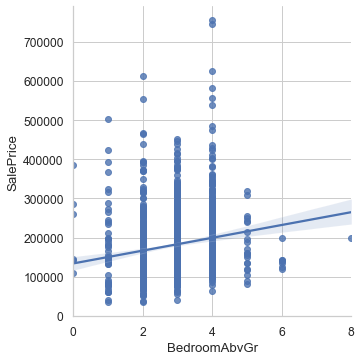

In [41]:
plt.figure(figsize=(8,6))

# We can plot a regression plot studying whether the number of bedrooms above ground effects the sale price 
# hue is used to show separation based off of categorical data
sns.lmplot(x='BedroomAbvGr', y='SalePrice', data=house)

In [42]:
## Back to the Tips Dataset
tips_df = sns.load_dataset('tips')
tips_df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

<Figure size 576x432 with 0 Axes>

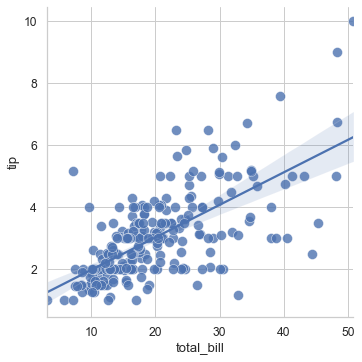

In [43]:
plt.figure(figsize=(8,6))

# We can plot a regression plot studying whether total bill effects the tip
sns.lmplot(x='total_bill', y='tip', data=tips_df,  
          scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'})

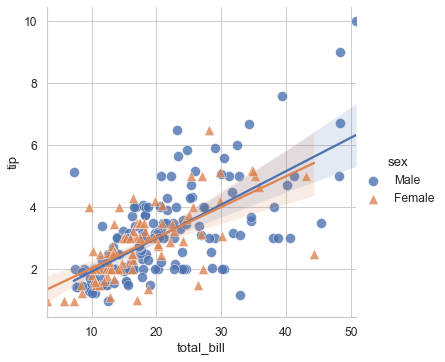

In [44]:
# Let's add in M/F for hue & see how it changes:
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o', '^'], 
          scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'})

  # We see that males tend to tip slightly more
  # Define different markers for men and women
  # You can effect the scatter plot by passing in a dictionary for styling of markers

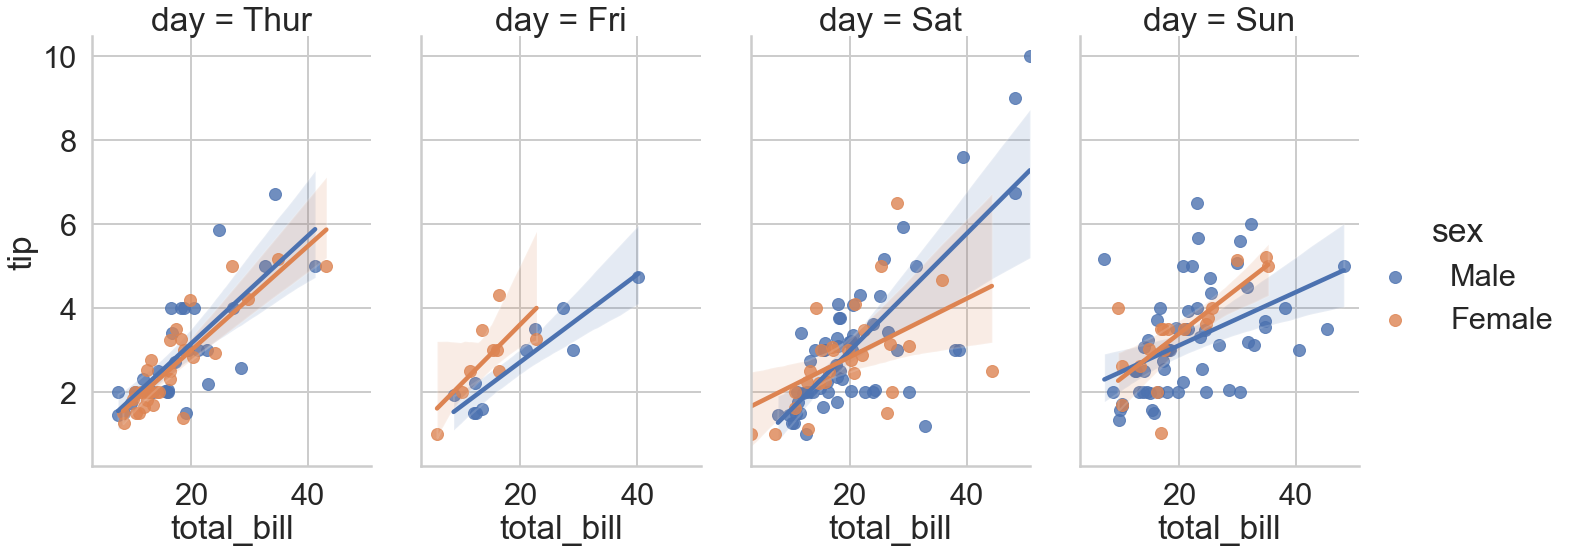

In [45]:
# You can separate the data into separate columns for day data
#sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df)
tips_df.head()

sns.lmplot(x='total_bill', y='tip', data=tips_df, col='day', hue='sex',
          height=8, aspect=0.6)

Logistic Regression

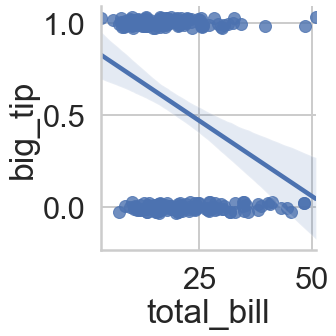

In [46]:
# When the y variable is binary, simple linear regression also “works” but provides implausible predictions:

tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

In [ ]:
# The solution in this case is to fit a logistic regression, 
# such that the regression line shows the estimated probability of y = 1 for a given value of x:

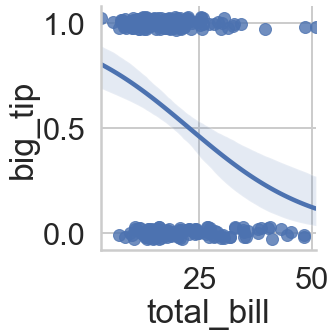

In [47]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

In [ ]:
# In breakout rooms, take use the titanic dataset and run through an exploratory data analysis
# Check out both the numerical & categorical variables 
# Pick a fews variable to use with a regression plot

titanic_df = sns.load_dataset('titanic')
titanic_df.head()

### Timeseries
(Geeks for Geeks)

In [48]:
# creating data
df = pd.DataFrame({'Date': ['2019-10-01', '2019-11-01', 
                            '2019-12-01','2020-01-01', 
                            '2020-02-01', '2020-03-01',
                            '2020-04-01', '2020-05-01',
                            '2020-06-01'],
                     
                   'Col_1': [34, 43, 14, 15,
                             15, 14, 31, 25, 62],
                     
                   'Col_2': [52, 66, 78, 15, 15,
                             5, 25, 25, 86],
                     
                   'Col_3': [13, 73, 82, 58, 52,
                             87, 26, 5, 56],
                     
                   'Col_4': [44, 75, 26, 15, 15,
                             14, 54, 25, 24]})
  
# view dataset
display(df)


Date  Col_1  Col_2  Col_3  Col_4
0  2019-10-01     34     52     13     44
1  2019-11-01     43     66     73     75
2  2019-12-01     14     78     82     26
3  2020-01-01     15     15     58     15
4  2020-02-01     15     15     52     15
5  2020-03-01     14      5     87     14
6  2020-04-01     31     25     26     54
7  2020-05-01     25     25      5     25
8  2020-06-01     62     86     56     24

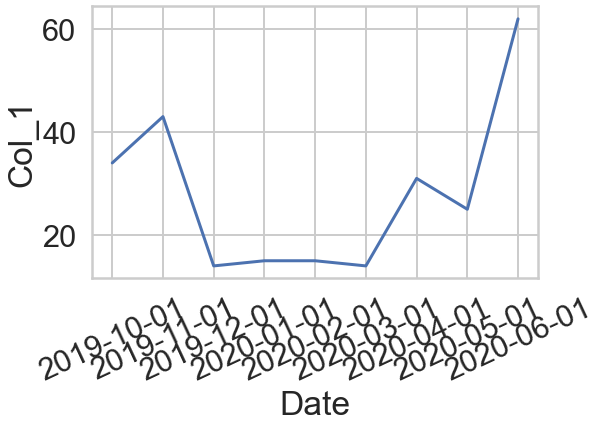

In [49]:
# create the time series plot
sns.lineplot(x = "Date", y = "Col_1",
             data = df)
  
plt.xticks(rotation = 25);

In [50]:
# re-creating data
df = pd.DataFrame({'Date': ['2020-06-01','2019-10-01', '2019-11-01', 
                            '2019-12-01','2020-01-01', 
                            '2020-02-01', '2020-03-01',
                            '2020-04-01', '2020-05-01'],
                     
                   'Col_1': [34, 43, 14, 15,
                             15, 14, 31, 25, 62],
                     
                   'Col_2': [52, 66, 78, 15, 15,
                             5, 25, 25, 86],
                     
                   'Col_3': [13, 73, 82, 58, 52,
                             87, 26, 5, 56],
                     
                   'Col_4': [44, 75, 26, 15, 15,
                             14, 54, 25, 24]})

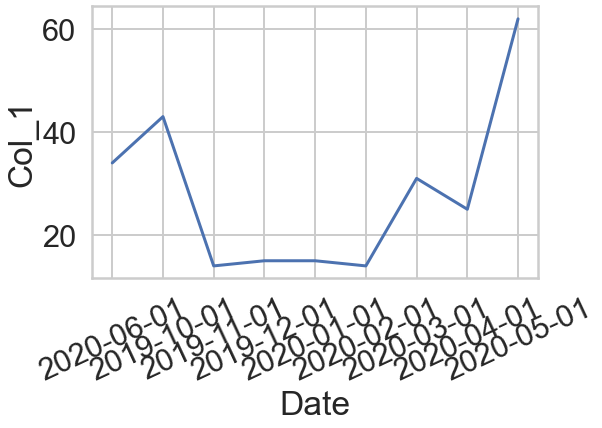

In [51]:
# create the time series plot
sns.lineplot(x = "Date", y = "Col_1",
             data = df)
  
plt.xticks(rotation = 25);

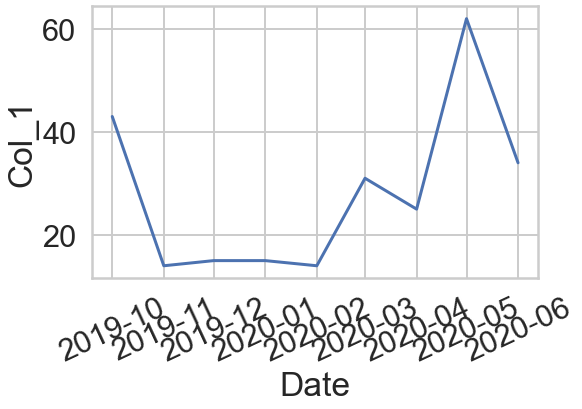

In [52]:
## Change Date column into Datetime Value
df['Date']= pd.to_datetime(df['Date'])

## Then plot again
sns.lineplot(x = "Date", y = "Col_1",
             data = df)
  
plt.xticks(rotation = 25);

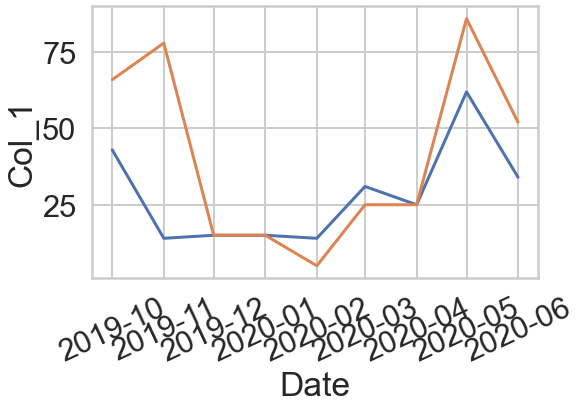

In [55]:
# create the time series plot
sns.lineplot(x = "Date", y = "Col_1", data = df)
sns.lineplot(x = "Date", y = "Col_2", data = df)
plt.xticks(rotation = 25);

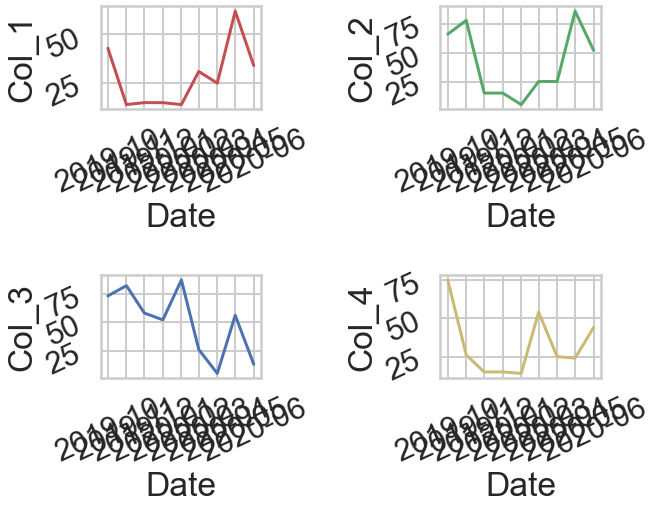

In [56]:
# create the time series subplots
fig,ax =  plt.subplots( 2, 2,
                       figsize = ( 10, 8))
  
sns.lineplot( x = "Date", y = "Col_1", 
             color = 'r', data = df, 
             ax = ax[0][0])
  
ax[0][0].tick_params(labelrotation = 25)
sns.lineplot( x = "Date", y = "Col_2", 
             color = 'g', data = df,
             ax = ax[0][1])
  
ax[0][1].tick_params(labelrotation = 25)
sns.lineplot(x = "Date", y = "Col_3", 
             color = 'b', data = df,
             ax = ax[1][0])
  
ax[1][0].tick_params(labelrotation = 25)
  
sns.lineplot(x = "Date", y = "Col_4", 
             color = 'y', data = df, 
             ax = ax[1][1])
  
ax[1][1].tick_params(labelrotation = 25)
fig.tight_layout(pad = 1.2)